In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
from pathlib import Path

In [2]:
DATA_BASE_DIR = Path('C:/Users/Jonathan/Documents/Development/git/gitlab/projectpr/data')

VIDEO_DIR = Path('raw/videos_raw')
FRAME_DIR = Path('interim/frames')
CROP_DIR = Path('interim/crops')
LABEL_DIR = Path('interim/labels')
DATASET_DIR = Path('processed')

VIDEO_FORMAT = '.mp4'
IMAGE_FORMAT = '.jpg'
LABEL_FORMAT = '.json'

In [3]:
SIDE_LENGTH = 384
SQUARE_SIZE = 0.053

LBL_ATT = {'id': 0, 'name': 'attacker'}
LBL_DEF = {'id': 1, 'name': 'defender'}

LBL_COLOR = ['r', 'g'] # index is label id

In [4]:
ds_name = 'dataset_test' # name of dataset

ds_img_base_path = DATA_BASE_DIR / DATASET_DIR / ds_name / 'images'
ds_lbl_base_path = DATA_BASE_DIR / DATASET_DIR / ds_name / 'labels'

In [8]:
imgs = [i[:-4] for i in os.listdir(ds_img_base_path) if i.endswith(IMAGE_FORMAT)]

In [6]:
def retrieve_labels(lines):
    labels = []
    for line in lines:
        elems = line.split(' ')        
        lbl = {'lbl': elems[0],
               'x': int((float(elems[1])-SQUARE_SIZE/2)*SIDE_LENGTH),
               'y': int((float(elems[2])-SQUARE_SIZE/2)*SIDE_LENGTH)}
        labels.append(lbl)

    return labels        

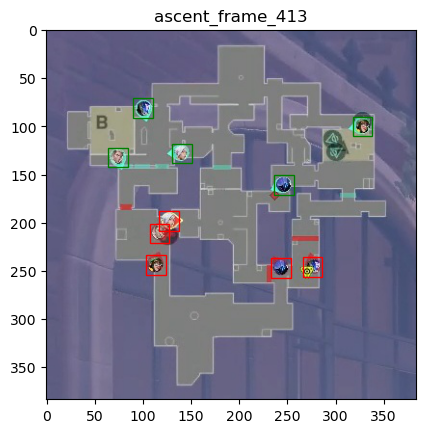

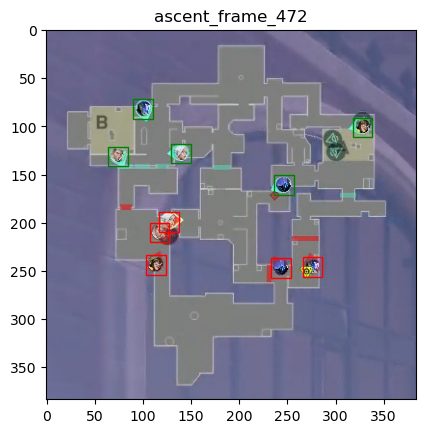

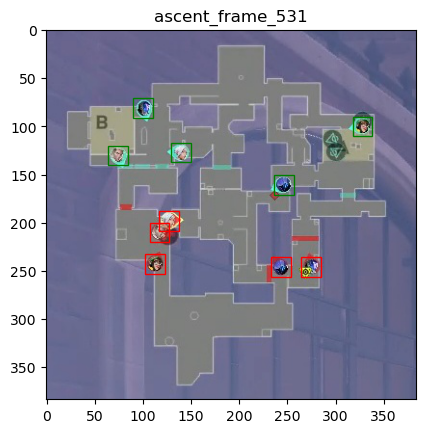

In [7]:
s = SQUARE_SIZE*SIDE_LENGTH

for (i,_) in enumerate(imgs):
    with open(ds_lbl_base_path / (imgs[i] + '.txt')) as file:
        lines = [line.rstrip() for line in file]
    
    img = Image.open(str(ds_img_base_path / (imgs[i] + IMAGE_FORMAT)))
    lbls = retrieve_labels(lines)
    
    # plot
    fig, ax = plt.subplots()
    ax.imshow(img)
    for lbl in lbls:
        rect = patches.Rectangle((lbl['x'], lbl['y']), s, s, linewidth=1, edgecolor=LBL_COLOR[int(lbl['lbl'])], facecolor='none')
        ax.add_patch(rect)    
    
    plt.title(imgs[i])